# Hamiltonian Monte Carlo Only

Joint target will be $\pi(q, p) = \pi(p \mid q) \pi(q)$ where we choose $\pi(p \mid q) = \mathcal{N}(0, M)$. The Hamiltonian is given by
$$
H(q, p) = -\log \pi(p \mid q) - \log \pi(q)
$$
Hamilton's equaitons describing the dynamics are
$$
\begin{align*}
\frac{d q}{dt} &= \partial_p K \\
\frac{d p}{dt} &= -\partial_q K - \partial_q V
\end{align*}
$$

Given our choice of the conditional distribution we have 
$$
K(q, p) = - \log \pi(p\mid q) = \frac{1}{2} p^\top M^{-1} p + \log(2\pi\text{det}(M))
$$

Its partial derivatives are therefore
$$
\begin{align*}
\partial_q K(q, p) &= 0 \\
\partial_p K(q, p) &= M^{-1}p
\end{align*}
$$

Similarly, since our target density is given by $\pi(q) = \mathcal{N}(\mu, \Sigma)$ we get
$$
-\partial_q V(q) = -\Sigma^{-1} (q - \mu)
$$

Hamilton's equations therefore become
$$
\begin{align*}
    \frac{dq}{dt} &= M^{-1}p \\
    \frac{dp}{dt} &= -\Sigma^{-1}(q - \mu)
\end{align*}
$$

In [2]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm
from Manifolds.RotatedEllipse import RotatedEllipse
from gaussian_hmc import GaussianTargetHMC

In [22]:
# Settings
Sigma = np.array([[1.0, 0.6], [0.6, 2.0]])  # Covariance Matrix of Target Distribution
mu = np.zeros(2)                            # Mean of target distribution
n = 20000                                    # Number of samples
T = 5                                       # Total integration time
epsilon = 0.05                              # Step size
M = np.eye(2)                               # Coviariance Matrix for momentum distribution

# Target distribution
target = multivariate_normal(mean=mu, cov=Sigma)

In [23]:
# Grab starting position
q0 = target.rvs()

# Instantiate HMC
hmc = GaussianTargetHMC(q0, n, M, T, epsilon, Sigma, mu)

# Run HMC
samples = hmc.sample()

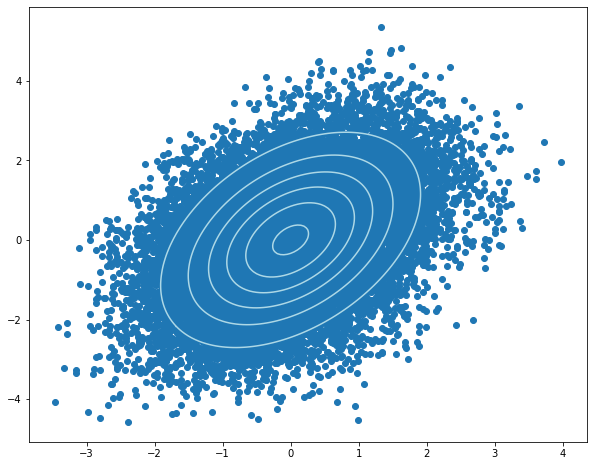

In [24]:
# Grid of points for contour plot
xmin, xmax, xstep = -3, 3, 0.05
ymin, ymax, ystep = -3, 3, 0.05
x_grid, y_grid = np.mgrid[xmin:xmax:xstep, ymin:ymax:ystep]
contour_values = target.pdf(np.dstack((x_grid, y_grid)))

# Plot contour plot and scatter points
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(samples[:, 0], samples[:, 1])
ax.contour(x_grid, y_grid, contour_values, colors="lightblue")
plt.show()

In [25]:
np.cov(samples.T)

array([[0.97720484, 0.53229135],
       [0.53229135, 1.8669197 ]])

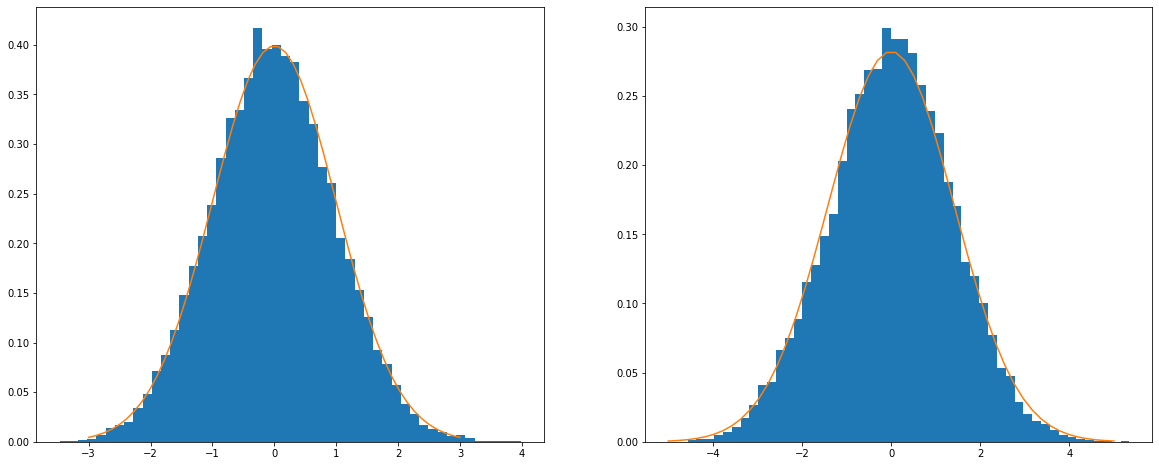

In [26]:
# marginals
marginal_x = norm(loc=mu[0], scale=np.sqrt(Sigma[0,0]))
marginal_y = norm(loc=mu[1], scale=np.sqrt(Sigma[1,1]))

# Plotting vars
xs = np.linspace(-3, 3)
ys = np.linspace(-5, 5)

fig, ax = plt.subplots(ncols=2, figsize=(20, 8))

# X space
_ = ax[0].hist(samples[:, 0], bins=50, density=True)
ax[0].plot(xs, marginal_x.pdf(xs))

# Y space
_ = ax[1].hist(samples[:, 1], bins=50, density=True)
ax[1].plot(ys, marginal_y.pdf(ys))

plt.show()

# Expectation

In [28]:
# Mean is close to 0
np.sum(samples, axis=0) / len(samples)

array([-0.01858977,  0.00980314])